In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df=pd.read_csv('https://raw.githubusercontent.com/Navya0019/data/main/Salary_dataset11.csv')

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


In [114]:
df.drop(columns=['Age','Gender','Education Level','Job Title'], inplace=True)

In [115]:
df.head()

,Years of Experience,Salary
0,5.0,90000
1,3.0,65000
2,15.0,150000
3,7.0,60000
4,20.0,200000


<Axes: xlabel='Years of Experience', ylabel='Salary'>

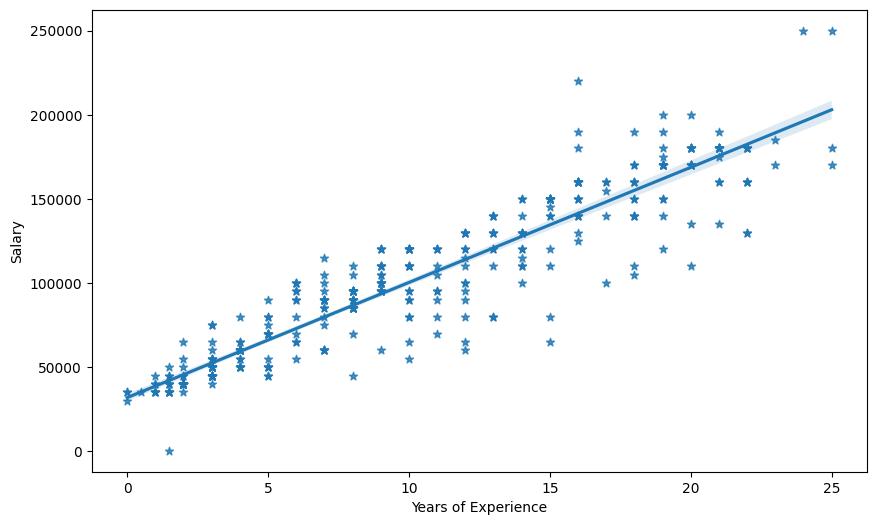

In [ ]:
#plotting the dataset

plt.figure(figsize=(10, 6))

sns.regplot(data=df,
               x='Years of Experience',
               y='Salary',
               marker='*')

In [ ]:
#Extracting features and target variables

X = np.array(df['Years of Experience']).reshape(-1,1)
y = np.array(df['Salary']).reshape(-1,1)

In [ ]:
# Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:


from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#missing values are filled using imputers


# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
# Impute missing values in y_train
y_train_imputed = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

# Now you can use X_train_imputed and y_train_imputed for training your linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_imputed, y_train_imputed)


LinearRegression()

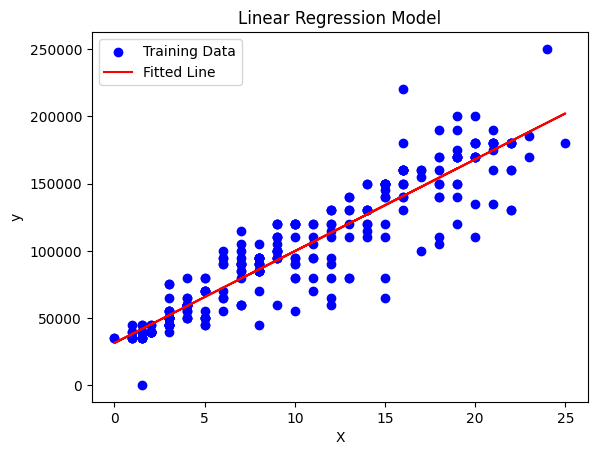

In [ ]:
#visualizing the fitted regression line along with the actual data points

plt.scatter(X_train_imputed, y_train_imputed, color='blue', label='Training Data')
plt.plot(X_train_imputed, linear_reg.predict(X_train_imputed), color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set using the linear regression model

# Transform the test data using the same imputer to give value for missing values
X_test_imputed = imputer.transform(X_test)
y_test_imputed = imputer.transform(y_test)
# make predictions on X_test_imputed
y_pred = linear_reg.predict(X_test_imputed)




In [ ]:
#Evaluating performance/ Evaluating the fit

from sklearn.metrics import r2_score

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(y_test_imputed, y_pred)
print("R-squared (coefficient of determination)/performance score:", r_squared)




R-squared (coefficient of determination)/performance score: 0.8991338517367767


In [ ]:

#The coefficients represent the slope of the regression line for each feature.
# to understand relationship between  dependent and independent variable

coefficients = linear_reg.coef_
intercept = linear_reg.intercept_
print("Slope:", coefficients[0])
print("Intercept:", intercept)


Slope: 6822.590174988686
Intercept: 31521.077620206008


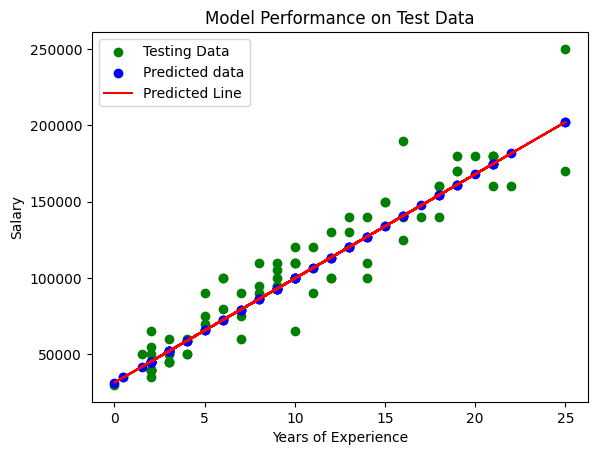

In [ ]:
# Visualize model performance on test data
plt.scatter(X_test, y_test_imputed, color='green', label='Testing Data')
plt.scatter(X_test, y_pred, color='blue', label='Predicted data')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Model Performance on Test Data')
plt.legend()
plt.show()

In [ ]:
# Assuming X_new contains new features for prediction

X_new = float(input("Enter the years of Experience : "))

# Reshape X_new to a 2D array predict accepts 2D only
X_new_reshaped = np.array(X_new).reshape(-1, 1)


y_new_pred = linear_reg.predict(X_new_reshaped)
print("Expected Salary is : ",y_new_pred)


Enter the years of Experience : 5
Expected Salary is :  [65634.02849515]


ASSIGNMENT SUBMITTED BY,

1. NAVYA K R - 38223047
2. FATHIMA SANA THACHAR KANDI - 38223032
3. SALINI. A. P - 38223056
4. SUJIL S - 38223066